# Data Analysis with python II (CFD data formats)

## Wladimir E. Banda-Barragán

In this tutorial, we will open datasets that are stored in different scientific data formats.

## Binary data

Binary data refers to raw data.

- It can be written in single (4 bytes = 32 bits) or double (8 bytes = 64 bits) precission.

- This means no headers, no metadata, and no information on the structure of the files is included in the data.

- Then, we need to know what sort of structure the data are stored in beforehand, otherwise we can just guess.

- In this case I generated the file beta_temp.dbl, so I know it has a 2D array of 160 x 160 cells


In [1]:
import numpy as np

dtype = np.dtype(np.float64)
dens = open("simulation_data/beta_temp.dbl", "rb")
data = np.fromfile(dens, dtype=dtype)
data2d = np.reshape(data,(160,160))
data2darr = np.array(data2d)
print(data2darr.shape)
print(dtype)

(160, 160)
float64


### Let us make some plots of these data:

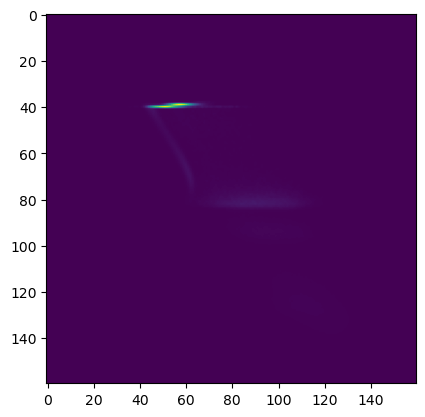

/Users/webb/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


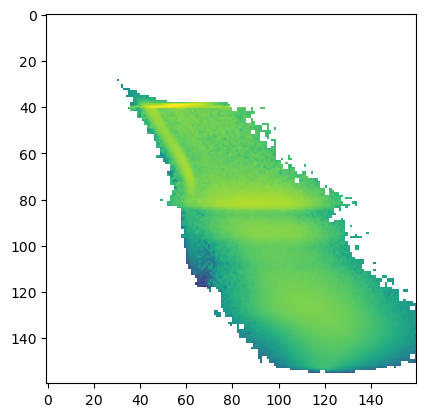

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.imshow(data2darr)
plt.show()

plt.imshow(np.log10(data2darr))
plt.show()

## NetCDF

This is the favourite format of Earth scientists!

In [3]:
import netCDF4 as nc

#Data downloaded from this repository: https://www.unidata.ucar.edu/software/netcdf/examples/files.html

fn = 'simulation_data/tos_O1_2001-2002.nc'
ds = nc.Dataset(fn)

Let us see the metadata of this file:

In [4]:
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: IPSL  model output prepared for IPCC Fourth Assessment SRES A2 experiment
    institution: IPSL (Institut Pierre Simon Laplace, Paris, France)
    source: IPSL-CM4_v1 (2003) : atmosphere : LMDZ (IPSL-CM4_IPCC, 96x71x19) ; ocean ORCA2 (ipsl_cm4_v1_8, 2x2L31); sea ice LIM (ipsl_cm4_v
    contact: Sebastien Denvil, sebastien.denvil@ipsl.jussieu.fr
    project_id: IPCC Fourth Assessment
    table_id: Table O1 (13 November 2004)
    experiment_id: SRES A2 experiment
    realization: 1
    cmor_version: 0.96
    Conventions: CF-1.0
    history: YYYY/MM/JJ: data generated; YYYY/MM/JJ+1 data transformed  At 16:37:23 on 01/11/2005, CMOR rewrote data to comply with CF standards and IPCC Fourth Assessment requirements
    references: Dufresne et al, Journal of Climate, 2015, vol XX, p 136
    comment: Test drive
    dimensions(sizes): lon(180), lat(170), time(24), bnds(2)
    variables(dime

In [5]:
print(ds.__dict__['source'])

IPSL-CM4_v1 (2003) : atmosphere : LMDZ (IPSL-CM4_IPCC, 96x71x19) ; ocean ORCA2 (ipsl_cm4_v1_8, 2x2L31); sea ice LIM (ipsl_cm4_v


In [6]:
for dim in ds.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 180
<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 170
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 24
<class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2


In [7]:
for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    bounds: lon_bnds
    original_units: degrees_east
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lon_bnds(lon, bnds)
unlimited dimensions: 
current shape = (180, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    bounds: lat_bnds
    original_units: degrees_north
unlimited dimensions: 
current shape = (170,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lat_bnds(lat, bnds)
unlimited dimensions: 
current shape = (170, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 ti

In [8]:
print(ds['tos'])

<class 'netCDF4._netCDF4.Variable'>
float32 tos(time, lat, lon)
    standard_name: sea_surface_temperature
    long_name: Sea Surface Temperature
    units: K
    cell_methods: time: mean (interval: 30 minutes)
    _FillValue: 1e+20
    missing_value: 1e+20
    original_name: sosstsst
    original_units: degC
    history:  At   16:37:23 on 01/11/2005: CMOR altered the data in the following ways: added 2.73150E+02 to yield output units;  Cyclical dimension was output starting at a different lon;
unlimited dimensions: time
current shape = (24, 170, 180)
filling on


In [9]:
tos_data = ds['tos'][:]

print(tos_data.shape)

tos_data1 = tos_data[1,:,:]

print(tos_data1.shape)

(24, 170, 180)
(170, 180)


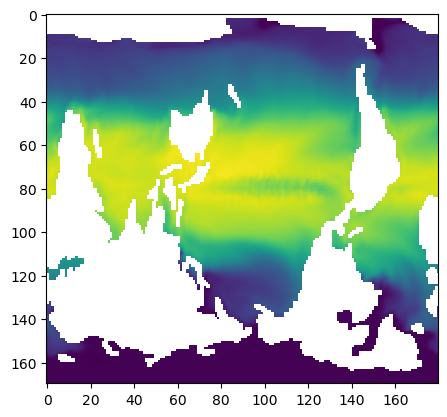

In [10]:
plt.imshow(np.log10(tos_data1))
plt.show()

## Visualization ToolKit (VTK) format

https://vtk.org/

This format is an open-source data format, developed by Kitware, and widely used in computational fluid dynamics and computer graphics applications. There are two sub-formats, legacy and XML.

### VTK file structure:

1. File version and ID.

2. Header, comments with informaton on the dataset.

3. Data type, which can be Binary or ASCII.

4. Domain structure, mesh/grid information:

- DATASET
    - STRUCTURED_GRID
    - UNSTRUCTURED_GRID
    - RECTILINEAR_GRID
    - POLYDATA
    - FIELD
    
- Coordinates, Dimensions, Grid spacing.

5. Attributes

- Values stored at grid cells, e.g. scalars, vectors, tensors.

Imagen tomada de: http://victorsndvg.github.io/FEconv/formats/vtk.xhtml

![SegmentLocal](images/VTK_files.png "segment")

In [11]:
import vtk
import numpy as np
import matplotlib.pyplot as plt

We define the input directory and file name:

In [12]:
# Downloaded from: https://people.sc.fsu.edu/~jburkardt/data/vtk/vtk.html

input_directory="./simulation_data/"
file_name = "shock-cloud.vtk"

In [13]:
# Here we include some lines to select the file we want to read

reader = vtk.vtkDataSetReader()
reader.SetFileName(input_directory+file_name)

# Now, we read all the scalar and vector quantities
reader.ReadAllScalarsOn()
reader.ReadAllVectorsOn()
reader.Update()

In [14]:
# Now, let's have a first look into the data
data = reader.GetOutput()

# Let's see the data structure
#print(data)

As we can see the data consists of a 3D grid of 50x50 cells/pixels, i.e. 2500 grid cells/pixels in total.

The data are organised in 6 arrays:

    Number Of Arrays: 6
    Array 0 name = rho
    Array 1 name = vx1
    Array 2 name = vx2
    Array 3 name = vx3
    Array 4 name = prs
    Array 5 name = tr1
    
  Bounds: 
    Xmin,Xmax: (-5, 15)
    Ymin,Ymax: (-10, 10)
    Zmin,Zmax: (-10, 10)
  Compute Time: 0
  Dimensions: (101, 101, 101)
  X Coordinates: 0x7fbefd475a70
  Y Coordinates: 0x7fbefd476cf0
  Z Coordinates: 0x7fbefd476fc0
  Extent: 0, 100, 0, 100, 0, 100    
    
Which we can now read with:

In [15]:
dens = data.GetCellData().GetArray("rho")
#velx = data.GetCellData().GetArray("vx1")
#vely = data.GetCellData().GetArray("vx2")
#velz = data.GetCellData().GetArray("vx3")

However, after reading the data, we notice that we have 1D arrays, instead of 2D. 


In [16]:
print(np.shape(dens))

(1000000,)


Therefore, we need to re-shape the array into 3D.

We can use the information on the dimensions from teh original VTK file.

In [17]:
dim = data.GetDimensions()

vec = list(dim)
vec = [i-1 for i in dim]

print("unit_vectors =", vec)

unit_vectors = [100, 100, 100]


Let's then use the above information for re-shaping the array:

In [18]:
rho = np.reshape(dens,(vec[0],vec[1],vec[2]))

print(np.shape(dens), np.shape(rho))

(1000000,) (100, 100, 100)


As we can see, the original density array has been converted from 1D to 3D.

# 3D Array manipulation

In [19]:
# We can slice arrays
A = rho[:,50,:]

# We can transpose arrays
B = rho[:,50,:].T

# We can multiply both
C = A*B

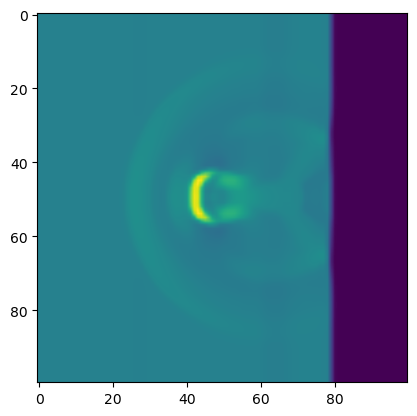

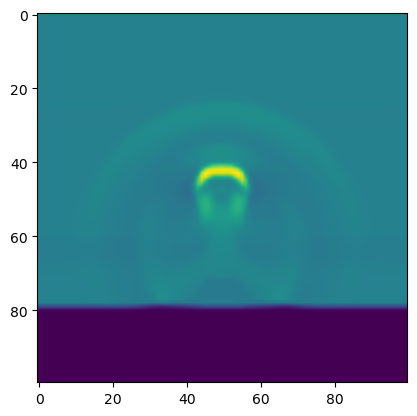

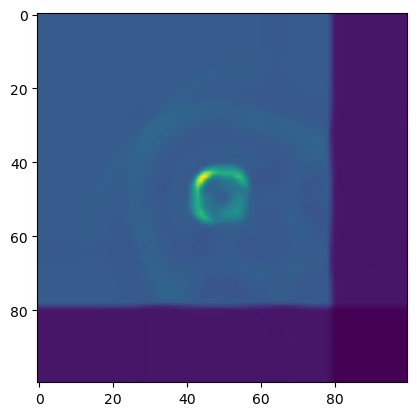

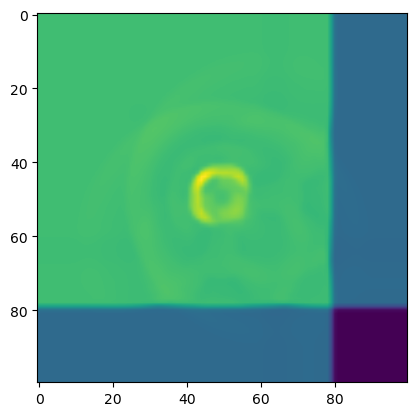

In [20]:
# Density map
plt.imshow(A, interpolation='bilinear')
plt.show()

plt.imshow(B, interpolation='bilinear')
plt.show()

plt.imshow(C, interpolation='bilinear')
plt.show()

# Now let us try with a log scale
plt.imshow(np.log10(C), interpolation='bilinear')
plt.show()

# FITS format

In [21]:
from astropy.io import fits

fits_image1 = fits.open('simulation_data/vorticity.fits')

vorticity = fits_image1[0].data

In [22]:
print(fits_image1)

In [23]:
print(vorticity.shape)

(256, 1280, 256)


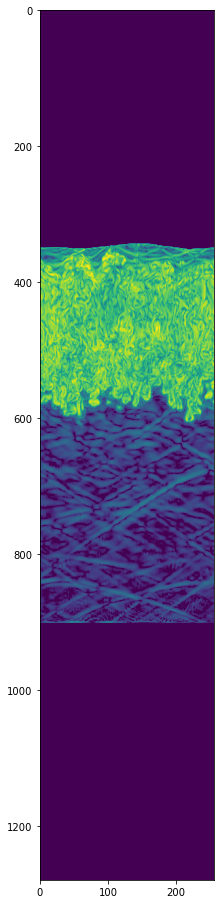

In [24]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,16))

vort = np.flipud(vorticity[:,:,128].T)
vort[vort==0]=1.e-10 
#print(np.min(vort), np.max(vort))
plt.imshow(np.log10(vort), vmin=-1, vmax=5, origin='upper', cmap = 'viridis')

#plt.xticks([-50, 0, +50], size=26)
#plt.xlim([-50,50])
#plt.ylim([-50,250])
#plt.yticks(size=26)
#plt.show()
#plt.savefig('vorticidad.png'.format(i), dpi=200, bbox_inches='tight')